# Разведочный анализ по датасету Netflix Data

![](https://storage.googleapis.com/kaggle-datasets-images/2437124/4123716/5f77f1250c922227ffffc4afb87317df/dataset-cover.png?t=2022-08-26-09-43-46)

## 1. Общая информация

Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. This dataset will be cleaned with Python and visualized with Superset. The purpose of this dataset is to test my data cleaning, exploring and visualization skills. The cleaned data can be found below and the Superset dashboard can be found here .

Датасет выложен на платформе [Kaggle](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization/)).

## 2. Загрузка файла

In [ ]:
from google.colab import files

In [ ]:
files.upload();

Saving netflix1.csv to netflix1.csv


In [11]:
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
import matplotlib.image as mpimg


# pd.options.display.max_rows = 8

In [ ]:
dataset = pd.read_csv('netflix1.csv')

In [ ]:
# сделаем обзор датасета

dataset.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# сделаем дополнительный обзор случайных строк, чтобы увидеть возможные особенности данных

dataset.sample(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
6611,s221,TV Show,Family Reunion,Not Given,United States,8/26/2021,2021,TV-PG,4 Seasons,"Kids' TV, TV Comedies"
6653,s443,TV Show,Johnny Test,Not Given,United States,7/16/2021,2021,TV-Y7,1 Season,"Kids' TV, TV Comedies"
5293,s7260,Movie,Laal Rang,Syed Ahmad Afzal,India,3/1/2018,2016,TV-14,143 min,"Dramas, International Movies, Thrillers"
601,s439,Movie,2 Weeks in Lagos,Kathryn Fasegha,Not Given,7/16/2021,2020,TV-PG,107 min,"Dramas, International Movies, Romantic Movies"
5750,s7859,Movie,Residente,René Pérez Joglar,United States,1/1/2018,2017,TV-MA,97 min,"Documentaries, Music & Musicals"
1225,s1294,TV Show,Pitta Kathalu,"Tharun Bhascker Dhaassyam, B. V. Nandini Reddy...",India,2/19/2021,2021,TV-MA,1 Season,"International TV Shows, TV Dramas"
8627,s7781,Movie,Power Rangers Super Samurai: Stuck on Christmas,Not Given,United States,1/1/2016,2012,TV-Y7,24 min,"Children & Family Movies, Sci-Fi & Fantasy"
6274,s8486,Movie,The Right One,Hadi El Bagoury,Egypt,6/13/2019,2011,TV-14,93 min,"Dramas, International Movies, Romantic Movies"
7721,s3901,TV Show,My Dear Boy,Not Given,Taiwan,4/19/2019,2017,TV-MA,1 Season,"International TV Shows, Romantic TV Shows"
6780,s924,TV Show,Trash Truck,Not Given,Pakistan,5/4/2021,2021,TV-Y,2 Seasons,Kids' TV


Из таблицы выше мы можем заметить, что в столбцах director и country присутствуют позиции 'Not given'. Обратим на это внимание при обработке данных в следующем шаге.

In [ ]:
dataset['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


## 3. Описание

Всего датасет содержит 8 790 записей по 9 признакам.
Информация, содержащаяся в датасете:

*   ID объекта (show_id)
*   Тип (type): фильм или ТВ-шоу, под которым подразумевается сериал
*   Наименование (title)
*   Режиссёр (director)
*   Страна (country)
*   Дата добавления объекта на платформу (date_added)
*   Год выпуска (release_year)
*   Возрастной рейтинг (rating)
*   Продолжительность (duration)
*   Жанры (listed_in)

**Расшифровка возрастных рейтингов** (классификация, используемая в США и в датасете)

*Recommended for Kids*

TV-Y - Designed to be appropriate for all children

TV-Y7 - Suitable for ages 7 and up

G - Suitable for General Audiences

TV-G - Suitable for General Audiences

PG - Parental Guidance suggested

TV-PG - Parental Guidance suggested


*Recommended for Teens*

PG-13 - Parents strongly cautioned. May be inappropriate for ages under 13.

TV-14 - Parents strongly cautioned. May not be suitable for ages under 14.

*Recommended for Adults*
R - Restricted. May be inappropriate for ages under 17.

TV-MA - For Mature Audiences

NC-17 - Inappropriate for ages 17 and under

## 4. Предобработка данных

In [ ]:
# проверим наличие дубликатов

dataset.duplicated().sum()

0

 Полных дубликатов не обнаружено.

In [ ]:
# оценим наличие пропущенных значений

dataset.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
# датасет не содержит пропущенных значений, однако, как мы выяснили ранее, столбцы 'director' и 'country' содержат позиции 'Not given'.
# посмотрим на них внимательнее

director_not_given = dataset[dataset['director'] == 'Not Given']
director_not_given

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
33,s20,TV Show,Jaguar,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh..."
34,s32,TV Show,Chicago Party Aunt,Not Given,Pakistan,9/17/2021,2021,TV-MA,1 Season,TV Comedies
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [ ]:
2588 / 8790

0.2944254835039818

In [ ]:
country_not_given = dataset[dataset['country'] == 'Not Given']
country_not_given

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
...,...,...,...,...,...,...,...,...,...,...
6005,s8161,Movie,Teenage Mutant Ninja Turtles: The Movie,Steve Barron,Not Given,1/1/2020,1990,PG,94 min,"Action & Adventure, Comedies"
6257,s8451,Movie,The Perfect Day,Jean-Pierre Devillers,Not Given,9/1/2018,2018,TV-14,93 min,"Documentaries, International Movies, Sports Mo..."
6366,s8603,Movie,Tom and Jerry: The Magic Ring,Phil Roman,Not Given,12/15/2019,2001,TV-Y7,60 min,"Children & Family Movies, Comedies"
6468,s8719,Movie,Westside vs. the World,Michael Fahey,Not Given,8/9/2019,2019,TV-MA,96 min,"Documentaries, Sports Movies"


In [ ]:
287 / 8790

0.03265073947667804

Всего позиций без указания режиссёра - 2 588, что составляет 29.4%, что существенно. Однако в текущих условиях у нас нет надежного способа заполнить эти строки, поэтому анализ будем проводить на заполненных данных.
Всего позиций без указания страны - 287, что составляет 3.3%. Это несущественная доля, эти строки можно игнорировать при анализе стран.

In [ ]:
# конвертируем столбец с датой добавления из строкового типа в специальный тип для дат

dataset['date_added'] = pd.to_datetime(dataset['date_added'])

## 4. Исследовательский анализ данных (EDA)

### 4.1 Тип (type)

In [ ]:
# выведем список всех типов

dataset['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [ ]:
# их всего 2 - фильм (movie) и сериал (TV show)
# посмотрим на их количество и соотношение

types = dataset['type'].value_counts()
types

Movie      6126
TV Show    2664
Name: type, dtype: int64

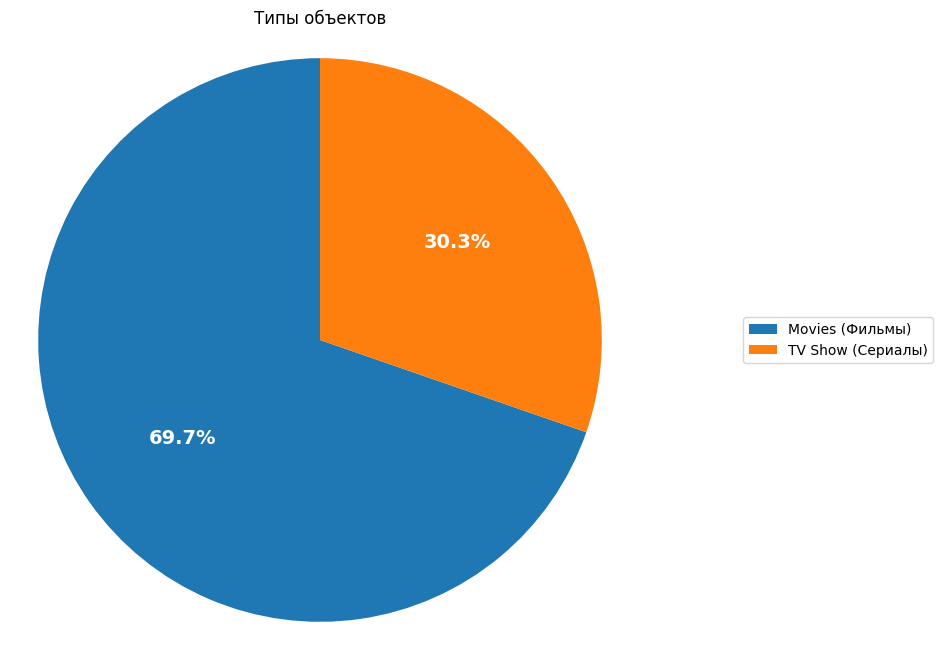

In [ ]:
# нарисуем диаграмму pie

labels = ['Movies (Фильмы)', 'TV Show (Сериалы)']

fig, ax = plt.subplots(figsize=(8,8))

wedges, texts, autotexts = ax.pie(types, autopct='%1.1f%%', startangle=90, textprops=dict(color='w'))

ax.legend(wedges, labels, loc='center right', bbox_to_anchor=(1, 0, 0.5, 1));

ax.set_title('Типы объектов', y=1);
plt.setp(autotexts, size=14, weight='bold');

plt.axis('equal');

plt.show()

#### Вывод по разделу:
В библиотеке Netflix преобладают фильмы (69.7% или 6 126 наименований).
Сериалы составляют 30.3% или 2 664 единиц.

### 4.2 Режиссер (director)

In [ ]:
# найдём топ-5 режиссёров по количеству наименований в библиотеке Netflix (первую строку с индексом 0 опускаем, так как она Not given и неинформативна)

directors_total = dataset['director'].value_counts()
directors_total[1:6]

Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Name: director, dtype: int64

In [ ]:
# найдём теперь топы режиссёров по количеству наименований в каждой из категорий: Фильмы и Сериалы

dataset_movies = dataset[dataset['type'] == 'Movie']
directors_movies = dataset_movies['director'].value_counts()[1:6]
directors_movies

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: director, dtype: int64

In [ ]:
dataset_tv_show = dataset[dataset['type'] == 'TV Show']
directors_tv_shows = dataset_tv_show['director'].value_counts()[1:6]
directors_tv_shows

Alastair Fothergill             14
Mark Thornton, Todd Kauffman     5
Stan Lathan                      3
Hsu Fu-chun                      2
Iginio Straffi                   2
Name: director, dtype: int64

In [ ]:
# теперь проанализируем из каких стран данные режиссеры

movies_directors_countries = pd.concat([directors_movies, dataset[['country']]], axis=1)
movies_directors_countries[0:5]

,director,country
Rajiv Chilaka,19.0,NaN
"Raúl Campos, Jan Suter",18.0,NaN
Suhas Kadav,16.0,NaN
Marcus Raboy,15.0,NaN
Jay Karas,14.0,NaN


In [ ]:
tv_shows_directors_countries = pd.concat([directors_tv_shows, dataset[['country']]], axis=1)
tv_shows_directors_countries[0:5]

,director,country
Alastair Fothergill,14.0,NaN
"Mark Thornton, Todd Kauffman",5.0,NaN
Stan Lathan,3.0,NaN
Hsu Fu-chun,2.0,NaN
Iginio Straffi,2.0,NaN


In [ ]:
# теперь проанализируем какие рейтинги присвоены работам данных режиссёров
# для этого создадим словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20.

labels = dataset['rating'].value_counts().index
colors_tab_20 = plt.cm.tab20.colors[:len(labels)]
colors = dict(zip(labels, colors_tab_20))
colors

{'TV-MA': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'TV-14': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 'TV-PG': (1.0, 0.4980392156862745, 0.054901960784313725),
 'R': (1.0, 0.7333333333333333, 0.47058823529411764),
 'PG-13': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'TV-Y7': (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'TV-Y': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'PG': (1.0, 0.596078431372549, 0.5882352941176471),
 'TV-G': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'NR': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'G': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'TV-Y7-FV': (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 'NC-17': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'UR': (0.9686274509803922, 0.7137254901960784, 0.8235294117647058)}

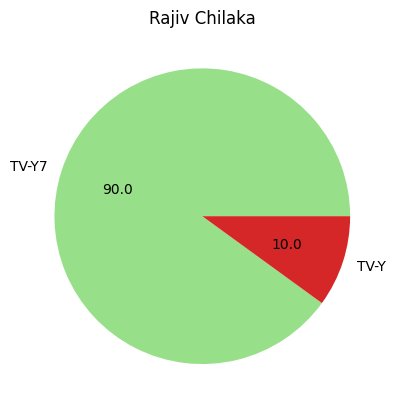

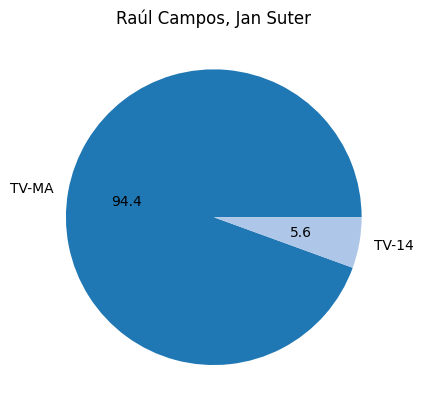

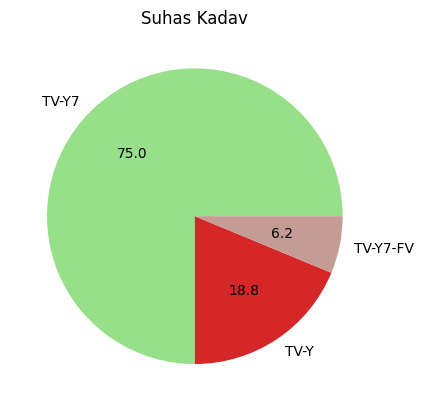

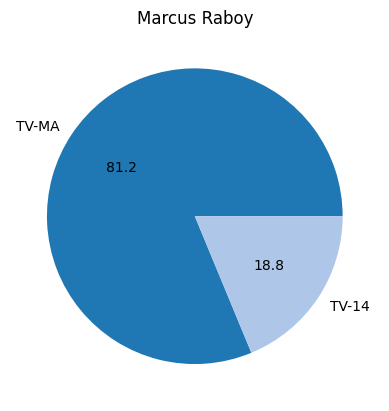

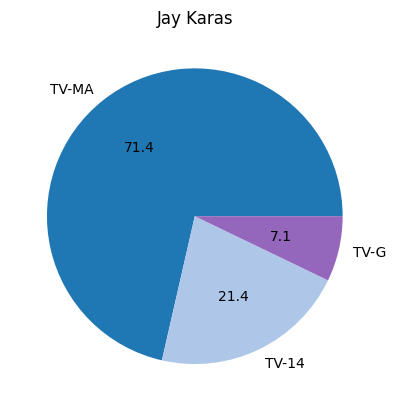

In [ ]:
# для каждого режиссёра построим круговую диаграмму, чтобы увидеть распределение возрастных рейтингов
# по фильмам

for director in directors_movies.index:
  df = dataset[dataset['director'] == director]

  rating_counts = df['rating'].value_counts()[:5]
  labels = rating_counts.index

  plt.title(director)
  plt.pie(rating_counts.values, labels = labels, colors = [colors[key] for key in labels], autopct='%.1f')
  plt.show()

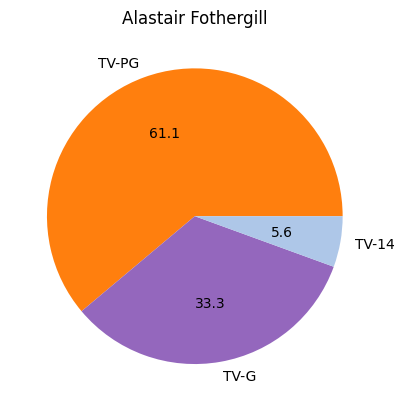

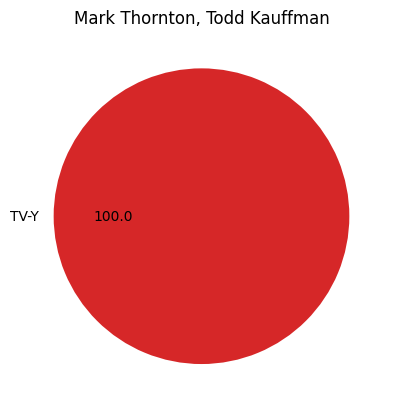

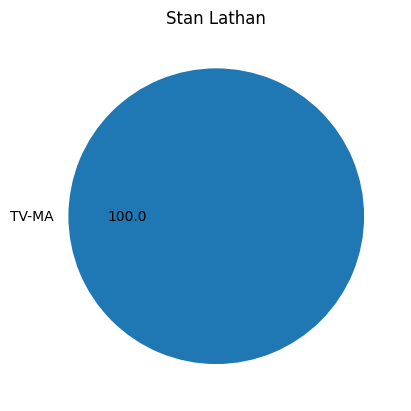

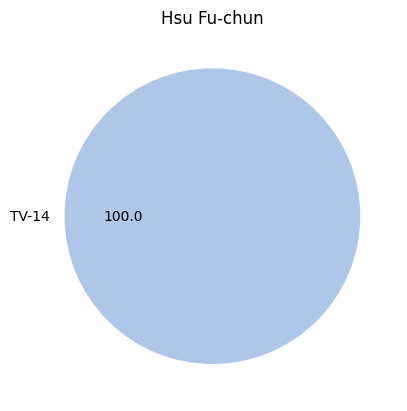

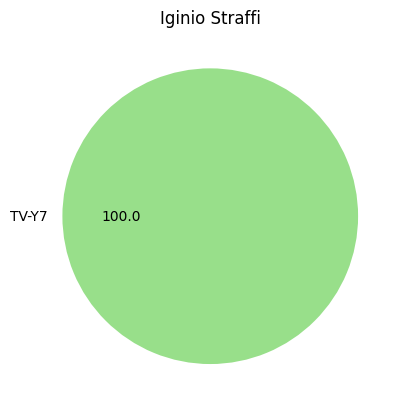

In [ ]:
# по сериалам

for director in directors_tv_shows.index:
  df = dataset[dataset['director'] == director]

  rating_counts = df['rating'].value_counts()[:5]
  labels = rating_counts.index

  plt.title(director)
  plt.pie(rating_counts.values, labels = labels, colors = [colors[key] for key in labels], autopct='%.1f')
  plt.show()

#### Вывод по разделу:

Мы выделили наиболее продуктивных режиссеров с точки зрения количества выпущенных фильмов и сериалов. Также для каждого мы выделили возрастные категории.
Топ по фильмам:

1)   Rajiv Chilaka             19 (90% для рейтинга TV-Y7 - Suitable for ages 7 and up, 10% - TV-Y - Designed to be appropriate for all children)

2)   Raúl Campos, Jan Suter    18 (94.4% для рейтинга TV-MA - For Mature Audiences, 5.6% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14)

3)   Suhas Kadav               16 (75% для рейтинга TV-Y7 - Suitable for ages 7 and up, 18.8% - TV-Y - Designed to be appropriate for all children, 6.2% - TV-Y7 FV Suitable for ages 7 and up (Fantasy Violence))

4)   Marcus Raboy              15 (81.2% для рейтинга TV-MA - For Mature Audiences, 18.8% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14)

5)   Jay Karas                 14 (71.4% для рейтинга TV-MA - For Mature Audiences, 21.4% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14, 7.1% - TV-G - Suitable for General Audiences)



Топ по сериалам:


1)   Alastair Fothergill             14 (61.1% для рейтинга TV-PG - Parental Guidance suggested, 33.3% - TV-G - Suitable for General Audiences, 5.6% - TV-14 Parents strongly cautioned. May not be suitable for ages under 14)

2)   Mark Thornton, Todd Kauffman     5 (100% - TV-Y - Designed to be appropriate for all children)

3)   Stan Lathan                      3 (100% - TV-MA - For Mature Audiences)

4)   Hsu Fu-chun                      2 (100% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14)

5)   Iginio Straffi                   2 (100% - TV-Y7 - Suitable for ages 7 and up)

При этом нам не удалось выявить к каким странам относятся данные режиссёры, так как информация о них в датасете не заполнена.

### 4.3 Страна (country)

In [ ]:
# проанализируем распределение фильмов и сериалов по странам

country_count = dataset['country'].value_counts()
country_count

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: country, Length: 86, dtype: int64

In [ ]:
# так как большое количество стран имеют небольшое количество объектов, то для целей визуализации объединим их в категорию 'Others'

limit_country = 50
dataset_1 = dataset.copy()
dataset_1['country'] = dataset['country'].replace(country_count[country_count < limit_country].index, 'Others')
country = dataset_1['country'].value_counts()
df_country_counts = pd.DataFrame({'country': country.index, 'count': country.values})
df_country_counts.head(10)

,country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Others,582
4,Pakistan,421
5,Not Given,287
6,Canada,271
7,Japan,259
8,South Korea,214
9,France,213


In [ ]:
# создадим такие же таблицы отдельно для фильмов и для сериалов

country_movies = dataset_1['country'][dataset_1['type'] == 'Movie'].value_counts()
df_country_counts_movies = pd.DataFrame({'country_movies': country_movies.index, 'count_movies': country_movies.values})
df_country_counts_movies.head(10)

,country_movies,count_movies
0,United States,2395
1,India,976
2,Others,404
3,United Kingdom,387
4,Not Given,257
5,Canada,187
6,France,148
7,Spain,129
8,Egypt,109
9,Nigeria,96


In [ ]:
country_tv_shows = dataset_1['country'][dataset_1['type'] == 'TV Show'].value_counts()
df_country_counts_tv_shows = pd.DataFrame({'country_tv_shows': country_tv_shows.index, 'count_tv_shows': country_tv_shows.values})
df_country_counts_tv_shows.head(10)

,country_tv_shows,count_tv_shows
0,United States,845
1,Pakistan,350
2,United Kingdom,251
3,Others,178
4,Japan,172
5,South Korea,165
6,Canada,84
7,India,81
8,Taiwan,71
9,France,65


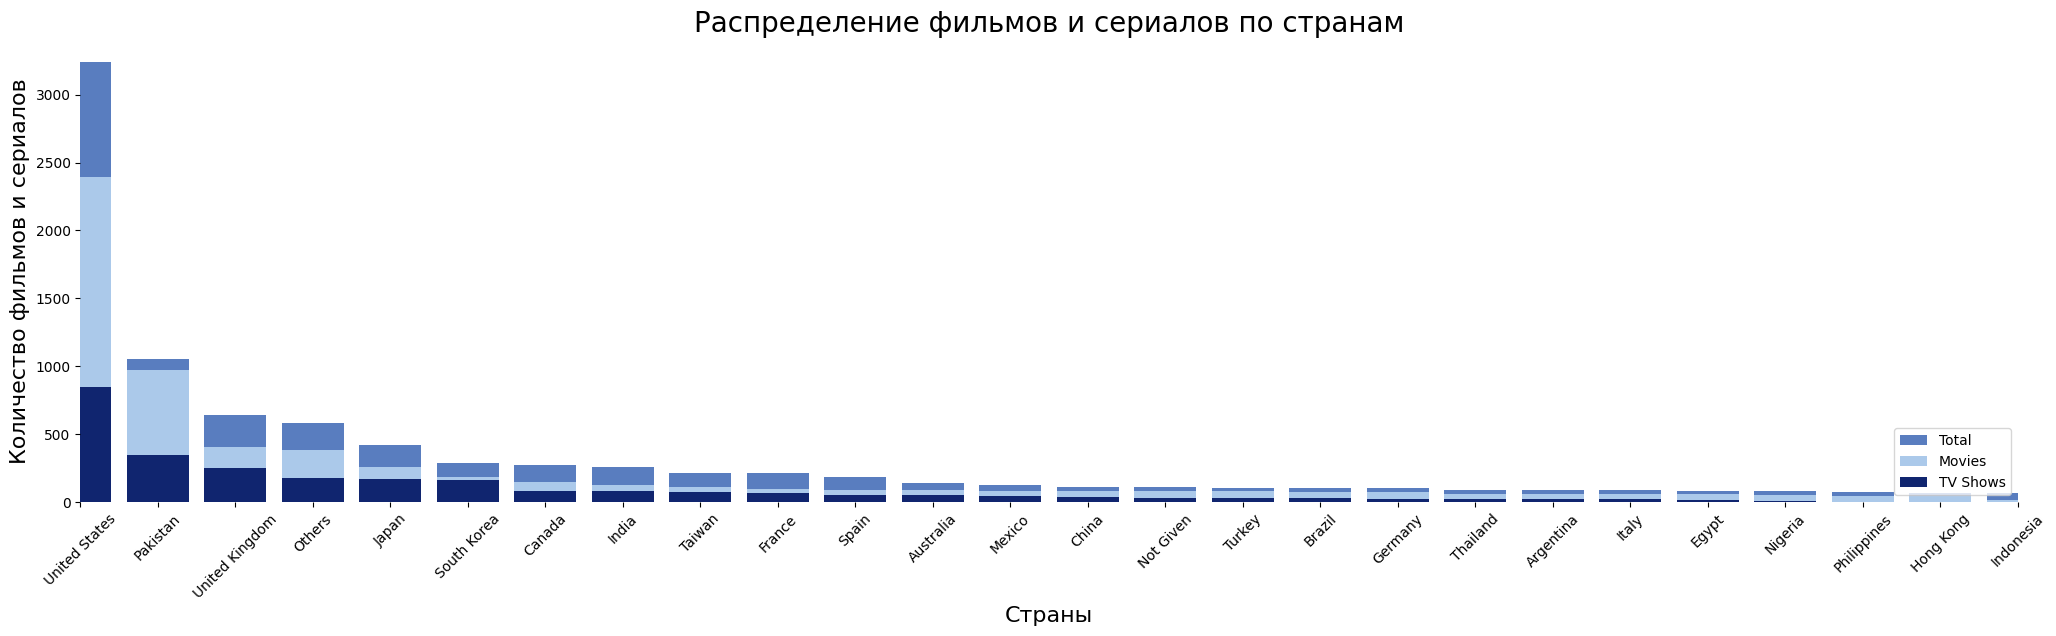

In [ ]:
# построим столбчатую диаграмму, иллюстрирующую распределение стран по количеству фильмов и сериалов

f, ax = plt.subplots(figsize=(25, 6))

sns.set_color_codes("muted")
sns.barplot(x='country', y='count', data=df_country_counts,
            label="Total", color="b")

sns.set_color_codes("pastel")
sns.barplot(x='country_movies', y='count_movies', data=df_country_counts_movies,
            label="Movies", color="b")

sns.set_color_codes("dark")
sns.barplot(x='country_tv_shows', y='count_tv_shows', data=df_country_counts_tv_shows,
            label="TV Shows", color="b")

plt.xticks(rotation=45)

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 25), xlabel="",
       ylabel="")
sns.despine(left=True, bottom=True)

plt.title('Распределение фильмов и сериалов по странам', fontsize = 20)
plt.ylabel('Количество фильмов и сериалов', fontsize = 16)
plt.xlabel('Страны', fontsize = 16);

#### Вывод по разделу:

Наибольшее количество фильмов и сериалов произведены следующими странами:


1.   United States	3240
2.   India	1057
3. United Kingdom	638
4. Pakistan	421
5. Canada	271
6.	Japan	259
7.	South Korea	214
8. 	France	213

При этом в категорию прочие (т.е. те, которые произвели менее 50 единиц) попали 582 объекта, а также 287 объектов не содержат информации в базе.

Дополнительно мы вывели топ по количеству фильмов и сериалов отдельно, в них присутствуют те же страны, а также добавились Spain, Egypt, Nigeria для фильмов и South Korea, Taiwan для сериалов.

### 4.4 Дата добавления (date_added)

In [ ]:
# найдём самую старую и самую новую даты добавления, а также найдём дату, в которую было добавлено больше всего объектов

dataset['date_added'].describe()

<ipython-input-37-0b5a0bf17288>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset['date_added'].describe()


count                    8790
unique                   1713
top       2020-01-01 00:00:00
freq                      110
first     2008-01-01 00:00:00
last      2021-09-25 00:00:00
Name: date_added, dtype: object

In [ ]:
first_added = dataset[dataset['date_added'] == '2008-01-01 00:00:00']
last_added = dataset[dataset['date_added'] == '2021-09-25 00:00:00']

print(f'Самый первый добавленный фильм - это {first_added["title"].to_string(index=False)}.')
print(f'Самый последний добавленный фильм - это {last_added["title"].to_string(index=False)}.')

Самый первый добавленный фильм - это To and From New York.
Самый последний добавленный фильм - это Dick Johnson Is Dead.


#### Вывод по разделу:

Самый первый добавленный фильм - это To and From New York.
Самый последний добавленный фильм - это Dick Johnson Is Dead (на момент выгрузки данных).
Дата, в которую было загружено больше всего фильмов и сериалов - 01 января 2020 года, в этот день было добавлено 110 наименований.

### 4.5 Год выпуска (release_year)

In [ ]:
# составим топ по году выпуска

years = dataset['release_year'].value_counts()
years

2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1966       1
1959       1
1925       1
1947       1
1961       1
Name: release_year, Length: 74, dtype: int64

In [ ]:
# составим также отдельные топы по году выпуска по фильмам и сериалам

years_movies = dataset['release_year'][dataset['type'] == 'Movie'].value_counts()
years_movies

2018    767
2017    765
2016    658
2019    633
2020    517
       ... 
1966      1
1961      1
1946      1
1963      1
1947      1
Name: release_year, Length: 73, dtype: int64

In [ ]:
years_tv_shows = dataset['release_year'][dataset['type'] == 'TV Show'].value_counts()
years_tv_shows.head()

2020    436
2019    397
2018    379
2021    315
2017    265
Name: release_year, dtype: int64

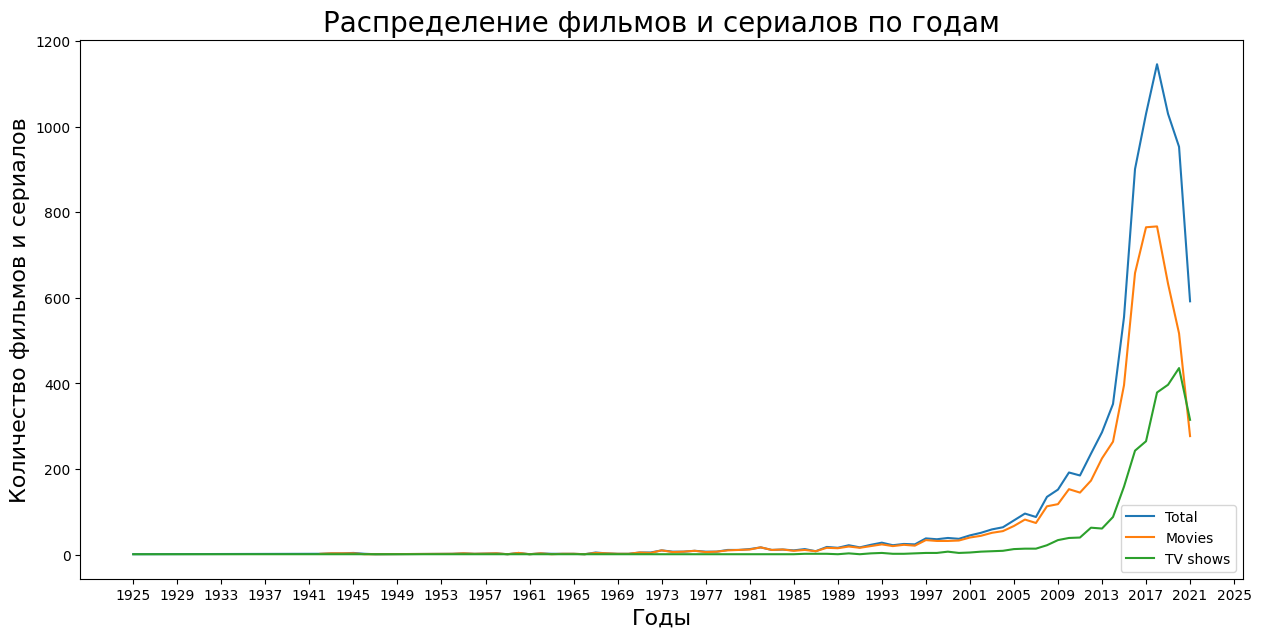

In [ ]:
# построим график временных рядов

f, ax = plt.subplots(figsize=(15, 7))


sns.lineplot(x=years.index, y=years.values,
             data=years, legend='auto', label = 'Total')

sns.lineplot(x=years_movies.index, y=years_movies.values,
             data=years_movies, legend='auto', label = 'Movies')

sns.lineplot(x=years_tv_shows.index, y=years_tv_shows.values,
             data=years_tv_shows, legend='auto', label = 'TV shows')

num_ticks = 30
ticks_years = np.arange(years.index.min(), years.index.max() + 5, step=int(np.ceil((years.index.max() - years.index.min()) / num_ticks)))
plt.xticks(ticks_years)
ax.legend(ncol=1, loc="lower right", frameon=True)

plt.title('Распределение фильмов и сериалов по годам', fontsize = 20)
plt.ylabel('Количество фильмов и сериалов', fontsize = 16)
plt.xlabel('Годы', fontsize = 16);

#### Вывод по разделу:

Наибольшее количество фильмов и сериалов было выпущено с 2016 по 2020 годы:


*   2018    1146
*   2017    1030
* 2019    1030
* 2020     953
* 2016     901

При этом в целом мы наблюдаем восходящий тренд по количеству, за исключением 2021 года. Данная ситуация может быть обусловлена либо тем, что датасет был выгружен до окончания 2021 года (у нас нет информации о дате выгрузки), либо обстоятельствами COVID-19, который мог препятствовать съемкам ввиду карантина в 2019 и 2020 годах.

Фильмов снимают больше, чем сериалов, однако тренд по количеству выпускаемых объектов почти совпадает.

### 4.6 Рейтинг (rating)

In [ ]:
ratings = dataset['rating'].value_counts()
df_ratings = pd.DataFrame({'ratings': ratings.index, 'count_ratings': ratings.values})
df_ratings

,ratings,count_ratings
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


In [ ]:
ratings_movies = dataset['rating'][dataset['type'] == 'Movie'].value_counts()
df_ratings_movies = pd.DataFrame({'ratings_movies': ratings_movies.index, 'count_ratings_movies': ratings_movies.values})
df_ratings_movies

,ratings_movies,count_ratings_movies
0,TV-MA,2062
1,TV-14,1427
2,R,797
3,TV-PG,540
4,PG-13,490
5,PG,287
6,TV-Y7,139
7,TV-Y,131
8,TV-G,126
9,NR,75


In [ ]:
ratings_tv_shows = dataset['rating'][dataset['type'] == 'TV Show'].value_counts()
df_ratings_tv_shows = pd.DataFrame({'ratings_tv_shows': ratings_tv_shows.index, 'count_ratings_tv_shows': ratings_tv_shows.values})
df_ratings_tv_shows

,ratings_tv_shows,count_ratings_tv_shows
0,TV-MA,1143
1,TV-14,730
2,TV-PG,321
3,TV-Y7,194
4,TV-Y,175
5,TV-G,94
6,NR,4
7,R,2
8,TV-Y7-FV,1


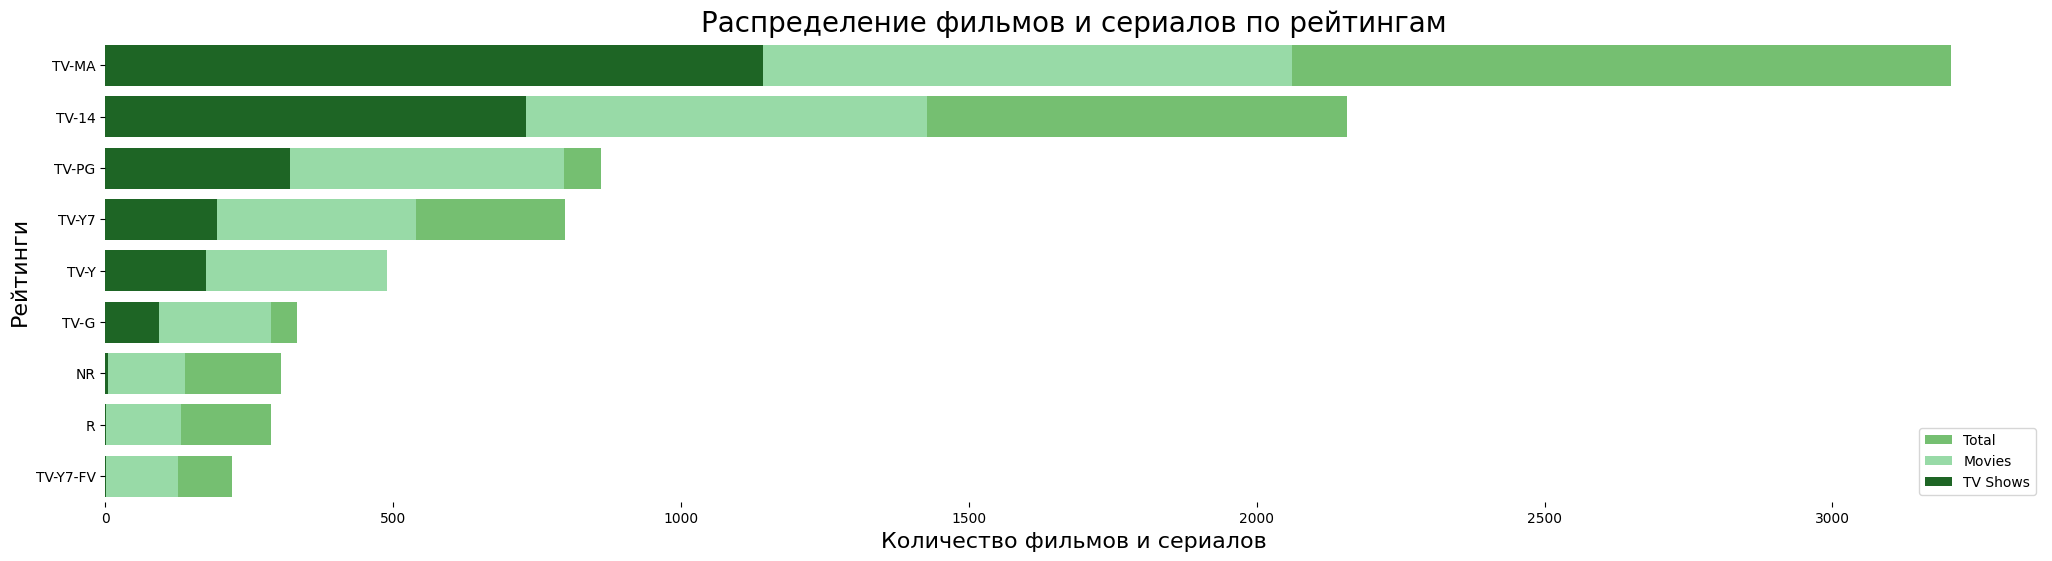

In [ ]:
# построим столбчатую диаграмму, иллюстрирующую распределение рейтинга по количеству фильмов и сериалов

f, ax = plt.subplots(figsize=(25, 6))

sns.set_color_codes("muted")
sns.barplot(x='count_ratings', y='ratings', data=df_ratings,
            label="Total", color="g")

sns.set_color_codes("pastel")
sns.barplot(x='count_ratings_movies', y='ratings_movies', data=df_ratings_movies,
            label="Movies", color="g")

sns.set_color_codes("dark")
sns.barplot(x='count_ratings_tv_shows', y='ratings_tv_shows', data=df_ratings_tv_shows,
            label="TV Shows", color="g")

plt.xticks(rotation=0)

ax.legend(ncol=1, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

plt.title('Распределение фильмов и сериалов по рейтингам', fontsize = 20)
plt.ylabel('Рейтинги', fontsize = 16)
plt.xlabel('Количество фильмов и сериалов', fontsize = 16);

#### Вывод по разделу:

Самые часто используемые рейтинги:


1.   TV-MA - For Mature Audiences
2.   TV-14 - Parents strongly cautioned. May not be suitable for ages under 14.
3. TV-PG - Parental Guidance suggested
4. TV-Y7 - Suitable for ages 7 and up
5. TV-Y - Designed to be appropriate for all children
6. TV-G - Suitable for General Audiences
7. NR - Not Rated
8. R - Restricted. May be inappropriate for ages under 17.
9. TV-Y7-FV - Suitable for ages 7 and up (Fantasy Violence)

В целом мы видим, что библиотека Netflix рассчитана в большей степени на взрослую аудиторию.
Распределение фильмов и сериалов вместе и раздельно по рейтингам примерно совпадает. Есть исключения:

*   Рейтинги R, PG-13, PG почти не используются для сериалов, тогда как для фильмов он один из наиболее популярных. Однако рейтинги PG-13 и PG по смыслу перекликаются с используемыми для сериалов TV-14 и TV-PG соответственно.


### 4.7 Продолжительность (duration)

In [ ]:
# анализировать будем отдельно для фильмов и для сериалов, так как продолжительность фильмов указана в минутах, а в сериалов - в количестве сезонов

dataset_movies = dataset[dataset['type'] == 'Movie']
dataset_movies['duration'].value_counts().head(10)

90 min     152
93 min     146
94 min     146
97 min     146
91 min     144
95 min     137
96 min     130
92 min     129
102 min    122
98 min     120
Name: duration, dtype: int64

In [ ]:
# удалим из столбца duraion ненужные символы, оставив только числовые значения и преобразуем столбец в числовой формат

dataset_movies['duration'] = dataset_movies['duration'].apply(lambda x: re.sub(r'\D', '', x))
dataset_movies['duration'] = pd.to_numeric(dataset_movies['duration'], errors='coerce')

dataset_movies

<ipython-input-48-9fb1feb3a0ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_movies['duration'] = dataset_movies['duration'].apply(lambda x: re.sub(r'\D', '', x))
<ipython-input-48-9fb1feb3a0ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_movies['duration'] = pd.to_numeric(dataset_movies['duration'], errors='coerce')


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,2019,TV-Y7,87,"Children & Family Movies, Comedies, Music & Mu..."
...,...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,Not Given,Hong Kong,2018-09-20,1983,TV-14,103,"Action & Adventure, Dramas, International Movies"
8707,s8269,Movie,The Darkest Dawn,Not Given,United Kingdom,2018-06-23,2016,TV-MA,75,"Action & Adventure, Independent Movies, Intern..."
8716,s8331,Movie,The Great Battle,Not Given,South Korea,2019-04-08,2018,TV-MA,136,"Action & Adventure, Dramas, International Movies"
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",Not Given,India,2017-01-15,2015,TV-14,89,"Dramas, International Movies"


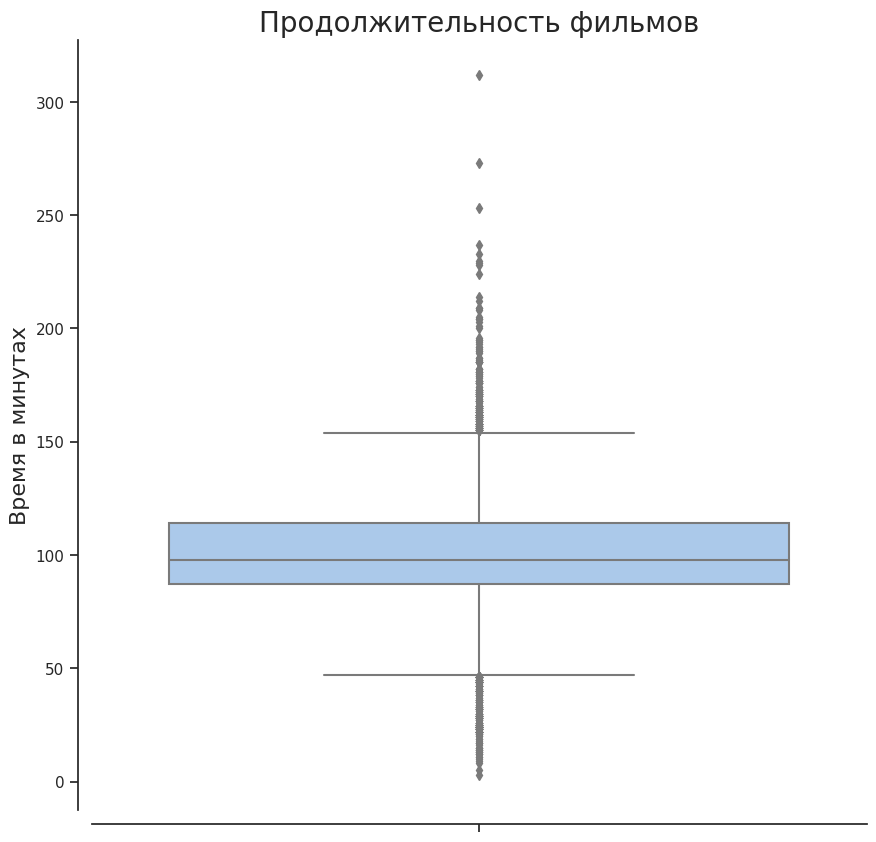

In [ ]:
# построим boxplot для длительности фильмов

sns.set_theme(style="ticks", palette="pastel")

f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y="duration",
           palette=["b", "g"],
            data=dataset_movies)
sns.despine(offset=10, trim=False)

plt.title('Продолжительность фильмов', fontsize = 20)
plt.ylabel('Время в минутах', fontsize = 16);

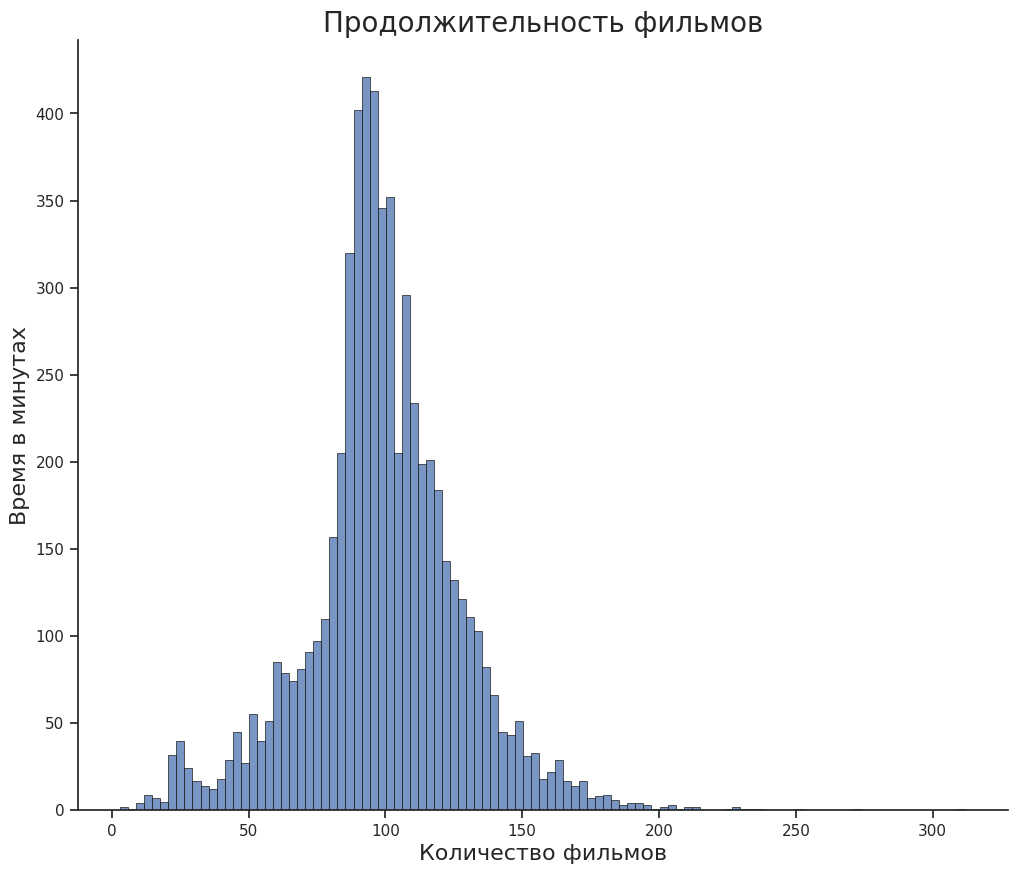

In [ ]:
# построим гистограмму для длительности фильмов

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(12, 10))
sns.despine(f)

sns.histplot(
    dataset_movies,
    x="duration",
    multiple="stack", # 'dodge' для примера
#    palette="light:m_r",
    edgecolor="0.1",
    linewidth=.5,
    log_scale=False,
)

plt.title('Продолжительность фильмов', fontsize = 20)
plt.xlabel('Количество фильмов', fontsize = 16);
plt.ylabel('Время в минутах', fontsize = 16);

In [ ]:
# дополнительно используем неграфический метод исследования данного параметра

dataset_movies['duration'].describe()

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

In [ ]:
# выполним все тоже самое для сериалов

dataset_tv_shows = dataset[dataset['type'] == 'TV Show']
dataset_tv_shows['duration'].value_counts().head(10)

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
Name: duration, dtype: int64

In [ ]:
1791/ 2664

0.6722972972972973

In [ ]:
dataset_tv_shows['duration'] = dataset_tv_shows['duration'].apply(lambda x: re.sub(r'\D', '', x))
dataset_tv_shows['duration'] = pd.to_numeric(dataset_tv_shows['duration'], errors='coerce')

dataset_tv_shows

<ipython-input-54-6cfeb78063be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_tv_shows['duration'] = dataset_tv_shows['duration'].apply(lambda x: re.sub(r'\D', '', x))
<ipython-input-54-6cfeb78063be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_tv_shows['duration'] = pd.to_numeric(dataset_tv_shows['duration'], errors='coerce')


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,2021,TV-14,9,"British TV Shows, Reality TV"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,2021,TV-MA,1,"British TV Shows, Crime TV Shows, Docuseries"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1,Kids' TV


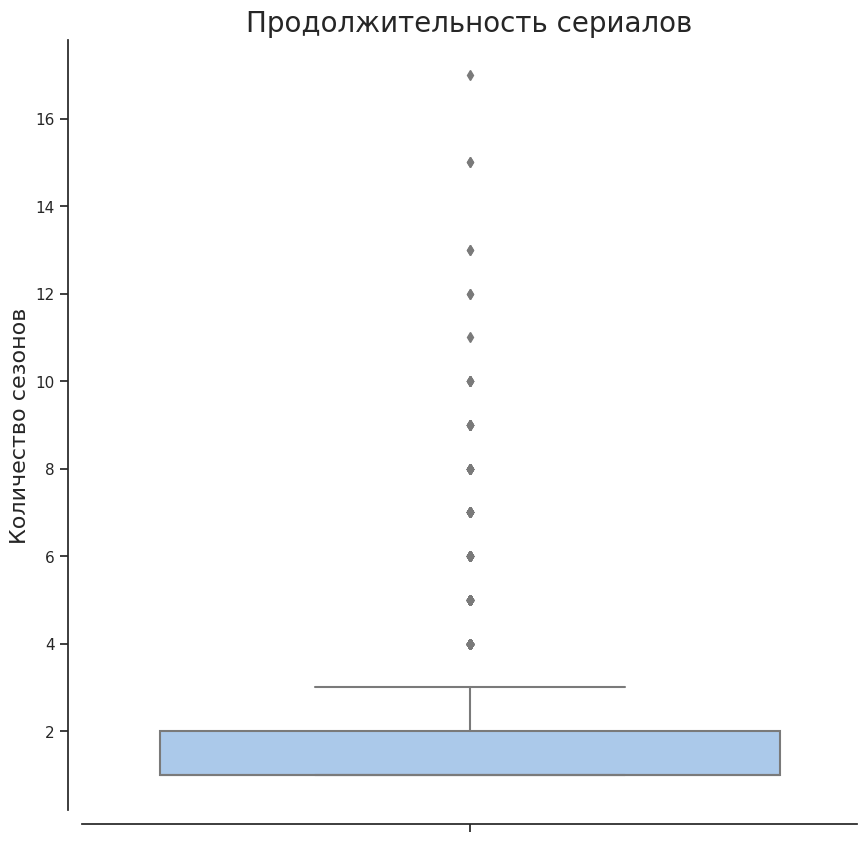

In [ ]:
sns.set_theme(style="ticks", palette="pastel")

f, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(y="duration",
           palette=["b", "g"],
            data=dataset_tv_shows)
sns.despine(offset=10, trim=False)

plt.title('Продолжительность сериалов', fontsize = 20)
plt.ylabel('Количество сезонов', fontsize = 16);

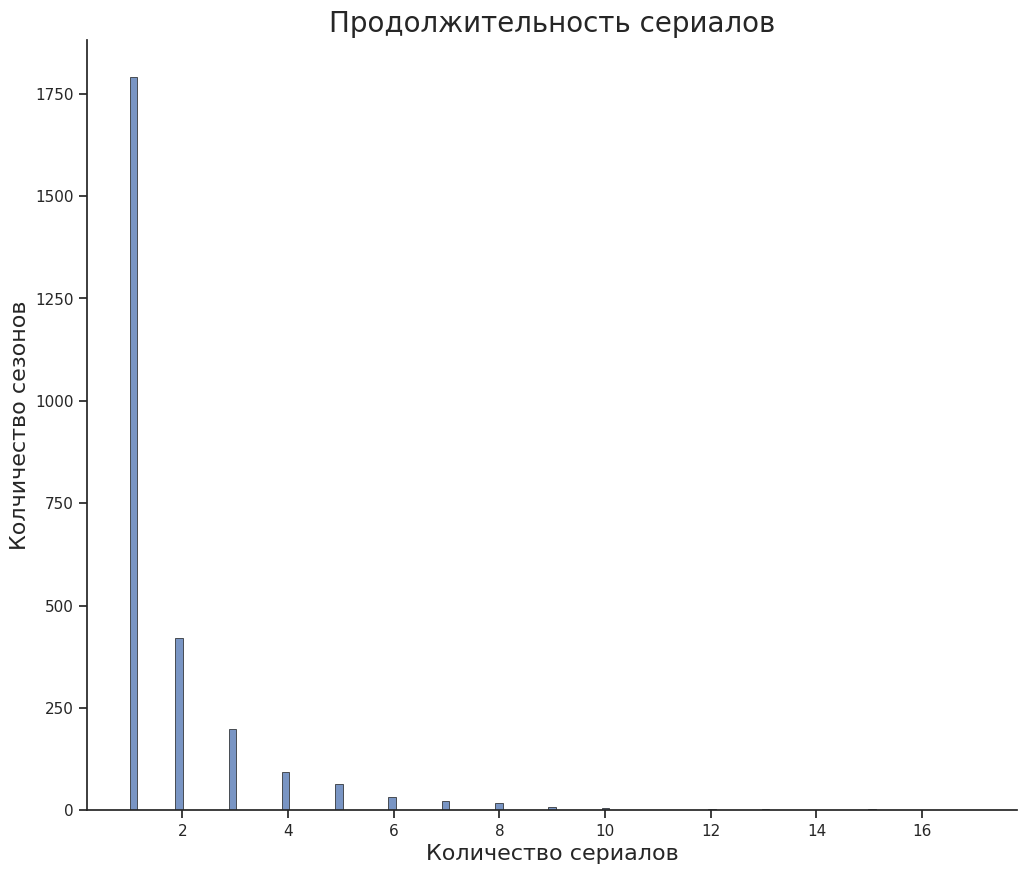

In [ ]:
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(12, 10))
sns.despine(f)

sns.histplot(
    dataset_tv_shows,
    x="duration",
    multiple="stack", # 'dodge' для примера
#    palette="light:m_r",
    edgecolor="0.1",
    linewidth=.5,
    log_scale=False,
)

plt.title('Продолжительность сериалов', fontsize = 20)
plt.xlabel('Количество сериалов', fontsize = 16);
plt.ylabel('Колчичество сезонов', fontsize = 16);

In [ ]:
dataset_tv_shows['duration'].describe()

count    2664.000000
mean        1.751877
std         1.550622
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration, dtype: float64

#### Вывод по разделу:

**Продолжительность фильмов**
Среднее значение - 100 минут, при этом медиана - 98 минут, что примерно на одном уровне. Минимальная продолжительность составляет 3 минуты, максимальная - 312 минут. 25-й перцентиль - 87 минут, 75-й - 114 минут.

**Продолжительность сериалов**
Большинство сериалов (67%) имеют 1 сезон, в среднем сериалы имеют 1.8 сезонов (среднее арифметическое). Минимальное значение - 1 сезон, максимальное - 17 сезонов. Наиболее часто встречаются 1-2 сезона.

### 4.8 Жанры (listed_in)

In [ ]:
# проанализируем какие жанры встречаются чаще всего

categories = dataset['listed_in'].str.split(', ', expand=True)
categories = categories.melt(value_name='category').dropna()['category']
top_categories = categories.value_counts()
top_categories_dataset = pd.DataFrame({'Category': top_categories.index, 'Value': top_categories.values})
top_categories_dataset.head(10)

,Category,Value
0,International Movies,2752
1,Dramas,2426
2,Comedies,1674
3,International TV Shows,1349
4,Documentaries,869
5,Action & Adventure,859
6,TV Dramas,762
7,Independent Movies,756
8,Children & Family Movies,641
9,Romantic Movies,616


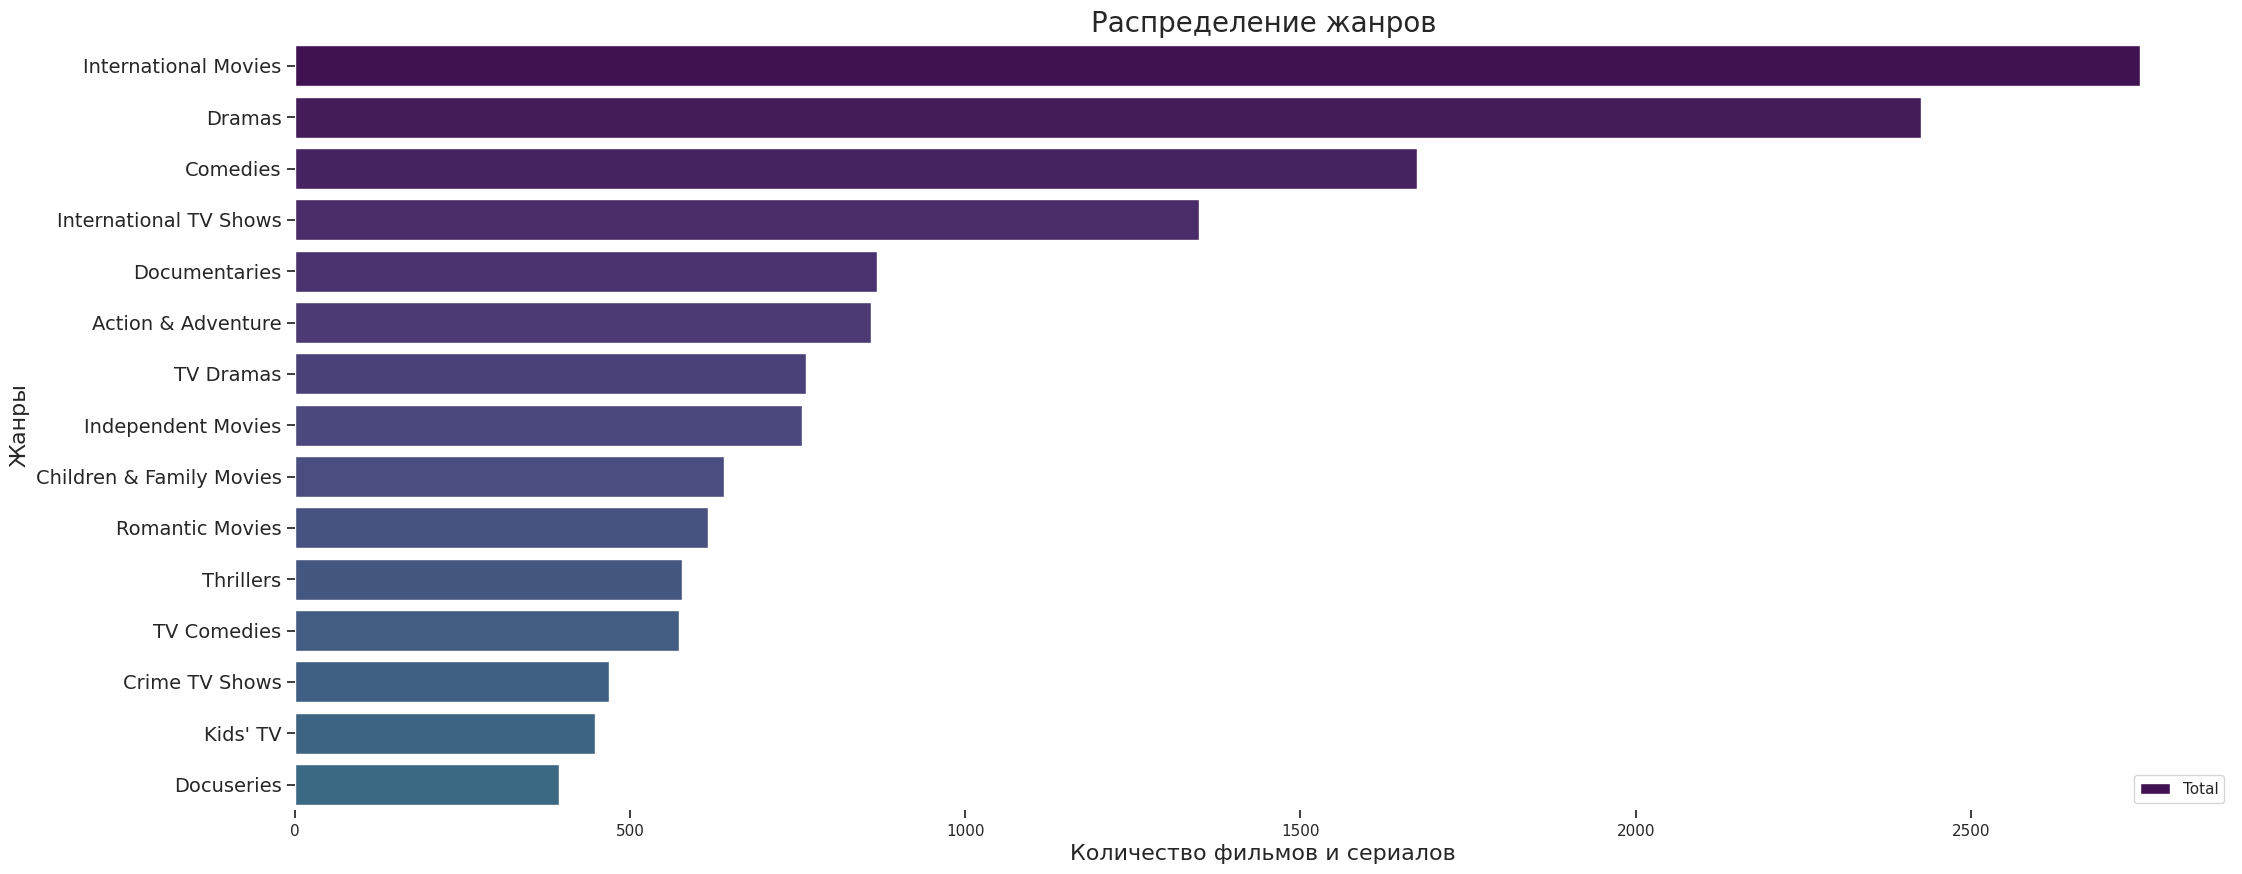

In [ ]:
# построим столбчатую диаграмму, иллюстрирующую распределение жанров в общей библиотеке фильмов и сериалов (для топ-15)
f, ax = plt.subplots(figsize=(25, 10))

sns.set_color_codes("muted")
colors = sns.color_palette('viridis', len(top_categories_dataset['Category'].unique()))
sns.barplot(x='Value', y='Category', data=top_categories_dataset.head(15),
            label="Total",
            palette=dict(zip(top_categories_dataset['Category'].unique(), colors)))

plt.xticks(rotation=0)

ax.legend(ncol=1, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

ax.tick_params(axis='y', labelsize=14)

plt.title('Распределение жанров', fontsize = 20)
plt.ylabel('Жанры', fontsize = 16)
plt.xlabel('Количество фильмов и сериалов', fontsize = 16);

In [ ]:
dataset

#### Вывод по разделу:

Наиболее часто встречаемые жанры:

1. International Movies	2752
2. 	Dramas	2426
3. 	Comedies	1674
4. 	International TV Shows	1349
5. 	Documentaries	869
6.	Action & Adventure	859
7.	TV Dramas	762
8.	Independent Movies	756
9.	Children & Family Movies	641
10.	Romantic Movies	616



## Общий вывод

**Тип объектов**

В библиотеке Netflix преобладают фильмы (69.7% или 6 126 наименований).
Сериалы составляют 30.3% или 2 664 единиц.

**Режиссёры**

Мы выделили наиболее продуктивных режиссеров с точки зрения количества выпущенных фильмов и сериалов. Также для каждого мы выделили возрастные категории.
Топ по фильмам:

1)   Rajiv Chilaka             19 (90% для рейтинга TV-Y7 - Suitable for ages 7 and up, 10% - TV-Y - Designed to be appropriate for all children)

2)   Raúl Campos, Jan Suter    18 (94.4% для рейтинга TV-MA - For Mature Audiences, 5.6% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14)

3)   Suhas Kadav               16 (75% для рейтинга TV-Y7 - Suitable for ages 7 and up, 18.8% - TV-Y - Designed to be appropriate for all children, 6.2% - TV-Y7 FV Suitable for ages 7 and up (Fantasy Violence))

4)   Marcus Raboy              15 (81.2% для рейтинга TV-MA - For Mature Audiences, 18.8% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14)

5)   Jay Karas                 14 (71.4% для рейтинга TV-MA - For Mature Audiences, 21.4% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14, 7.1% - TV-G - Suitable for General Audiences)



Топ по сериалам:


1)   Alastair Fothergill             14 (61.1% для рейтинга TV-PG - Parental Guidance suggested, 33.3% - TV-G - Suitable for General Audiences, 5.6% - TV-14 Parents strongly cautioned. May not be suitable for ages under 14)

2)   Mark Thornton, Todd Kauffman     5 (100% - TV-Y - Designed to be appropriate for all children)

3)   Stan Lathan                      3 (100% - TV-MA - For Mature Audiences)

4)   Hsu Fu-chun                      2 (100% - TV-14 - Parents strongly cautioned. May not be suitable for ages under 14)

5)   Iginio Straffi                   2 (100% - TV-Y7 - Suitable for ages 7 and up)

При этом нам не удалось выявить к каким странам относятся данные режиссёры, так как информация о них в датасете не заполнена.

**Страны**

Наибольшее количество фильмов и сериалов произведены следующими странами:


1.   United States	3240
2.   India	1057
3. United Kingdom	638
4. Pakistan	421
5. Canada	271
6.	Japan	259
7.	South Korea	214
8. 	France	213

При этом в категорию прочие (т.е. те, которые произвели менее 50 единиц) попали 582 объекта, а также 287 объектов не содержат информации в базе.

Дополнительно мы вывели топ по количеству фильмов и сериалов отдельно, в них присутствуют те же страны, а также добавились Spain, Egypt, Nigeria для фильмов и South Korea, Taiwan для сериалов.

**Дата добавления**

Наибольшее количество фильмов и сериалов было выпущено с 2016 по 2020 годы:


*   2018    1146
*   2017    1030
* 2019    1030
* 2020     953
* 2016     901

При этом в целом мы наблюдаем восходящий тренд по количеству, за исключением 2021 года. Данная ситуация может быть обусловлена либо тем, что датасет был выгружен до окончания 2021 года (у нас нет информации о дате выгрузки), либо обстоятельствами COVID-19, который мог препятствовать съемкам ввиду карантина в 2019 и 2020 годах.

Фильмов снимают больше, чем сериалов, однако тренд по количеству выпускаемых объектов почти совпадает.

**Год выпуска**

Самый первый добавленный фильм - это To and From New York.
Самый последний добавленный фильм - это Dick Johnson Is Dead (на момент выгрузки данных).
Дата, в которую было загружено больше всего фильмов и сериалов - 01 января 2020 года, в этот день было добавлено 110 наименований.

**Рейтинги**

Самые часто используемые рейтинги:


1.   TV-MA - For Mature Audiences
2.   TV-14 - Parents strongly cautioned. May not be suitable for ages under 14.
3. TV-PG - Parental Guidance suggested
4. TV-Y7 - Suitable for ages 7 and up
5. TV-Y - Designed to be appropriate for all children
6. TV-G - Suitable for General Audiences
7. NR - Not Rated
8. R - Restricted. May be inappropriate for ages under 17.
9. TV-Y7-FV - Suitable for ages 7 and up (Fantasy Violence)

В целом мы видим, что библиотека Netflix рассчитана в большей степени на взрослую аудиторию.
Распределение фильмов и сериалов вместе и раздельно по рейтингам примерно совпадает. Есть исключения:

*   Рейтинги R, PG-13, PG почти не используются для сериалов, тогда как для фильмов он один из наиболее популярных. Однако рейтинги PG-13 и PG по смыслу перекликаются с используемыми для сериалов TV-14 и TV-PG соответственно.

**Продолжительность фильмов**

Среднее значение - 100 минут, при этом медиана - 98 минут, что примерно на одном уровне. Минимальная продолжительность составляет 3 минуты, максимальная - 312 минут. 25-й перцентиль - 87 минут, 75-й - 114 минут.

**Продолжительность сериалов**

Большинство сериалов (67%) имеют 1 сезон, в среднем сериалы имеют 1.8 сезонов (среднее арифметическое). Минимальное значение - 1 сезон, максимальное - 17 сезонов. Наиболее часто встречаются 1-2 сезона.

**Жанры**

Наиболее часто встречаемые жанры:

1. International Movies	2752
2. 	Dramas	2426
3. 	Comedies	1674
4. 	International TV Shows	1349
5. 	Documentaries	869
6.	Action & Adventure	859
7.	TV Dramas	762
8.	Independent Movies	756
9.	Children & Family Movies	641
10.	Romantic Movies	616


In [5]:
# Дашборд

![](http://146.120.224.155:20000/superset/dashboard/p/pQD3b2z3qaW/)

/bin/bash: -c: line 1: syntax error near unexpected token `http://146.120.224.155:20000/superset/dashboard/p/pQD3b2z3qaW/'
/bin/bash: -c: line 1: `[](http://146.120.224.155:20000/superset/dashboard/p/pQD3b2z3qaW/)'


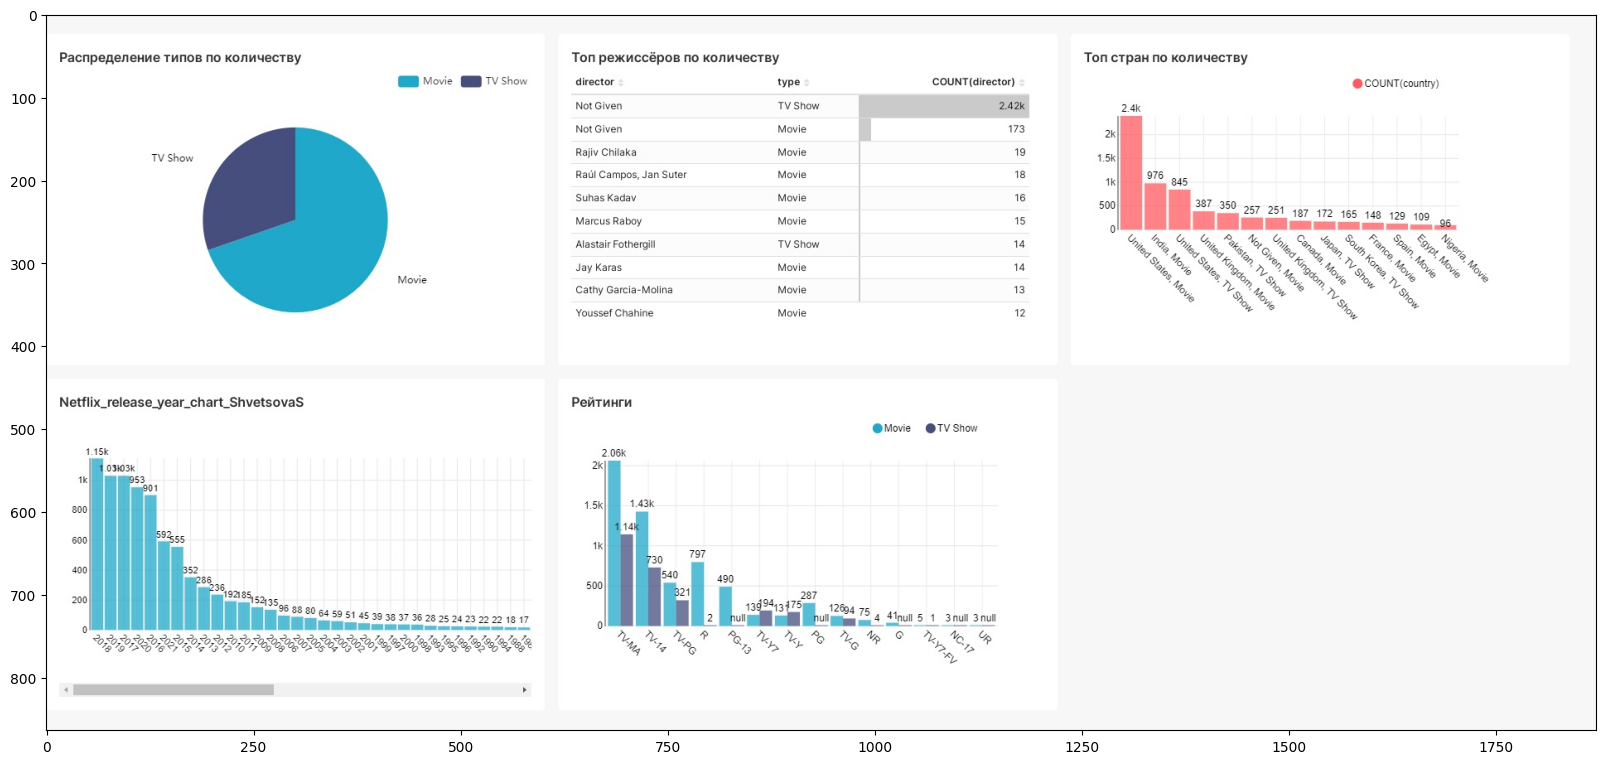

In [21]:
plt.figure(figsize=(20, 20))
img_path = '/content/shvetsova-s-netflix-2023-12-04T15-03-08.948Z.jpg'
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)

plt.show()